In [3]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model  import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-sales/Car_sales.csv
/kaggle/input/cardataset/data.csv
/kaggle/input/automobile-dataset/Automobile.csv


In [6]:
data = pd.read_csv('/kaggle/input/automobile-dataset/Automobile.csv')

In [7]:
data.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


In [6]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
data.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

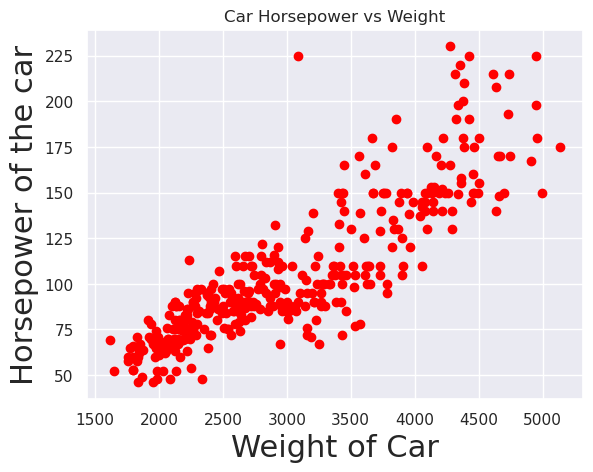

In [8]:
plt.scatter(data['weight'],data['horsepower'],c='red')
plt.title('Car Horsepower vs Weight')
plt.xlabel('Weight of Car',size=22)
plt.ylabel('Horsepower of the car',size=22)
plt.show()

In [9]:
data_1 = data[['weight','horsepower']]
data_1.head()


,weight,horsepower
0,3504,130.0
1,3693,165.0
2,3436,150.0
3,3433,150.0
4,3449,140.0


In [10]:
data_1.describe()

,weight,horsepower
count,398.000000,392.000000
mean,2970.424623,104.469388
std,846.841774,38.491160
min,1613.000000,46.000000
25%,2223.750000,75.000000
50%,2803.500000,93.500000
75%,3608.000000,126.000000
max,5140.000000,230.000000


/tmp/ipykernel_33/2347024438.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['weight'])


<Axes: xlabel='weight', ylabel='Density'>

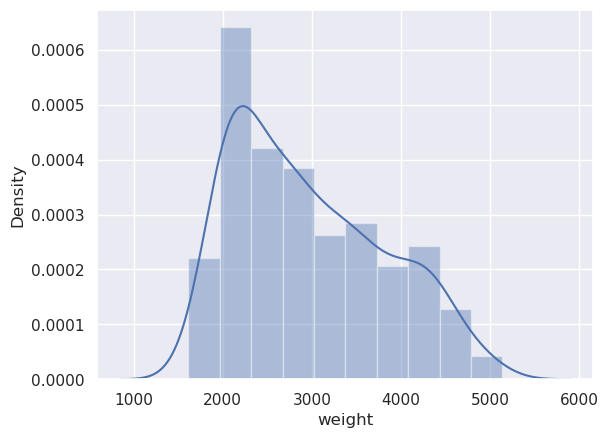

In [11]:
sns.distplot(data_1['weight'])

/tmp/ipykernel_33/3477167203.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['horsepower'])


<Axes: xlabel='horsepower', ylabel='Density'>

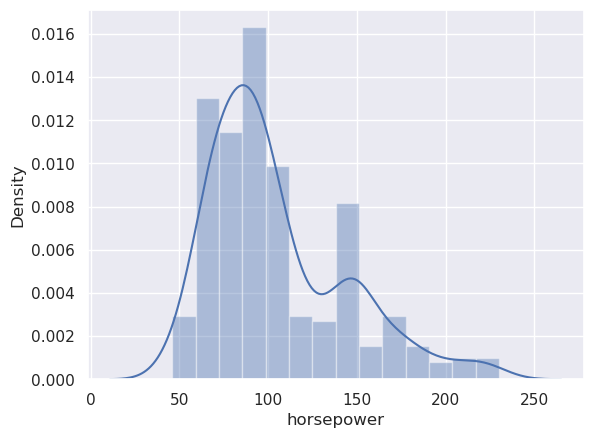

In [12]:
sns.distplot(data_1['horsepower'])

In [49]:
data_1 = data_1.dropna(axis=0)

In [50]:
input = data_1['weight']
target = data_1['horsepower']

In [14]:
input.shape

(398,)

In [15]:
target.shape

(398,)

Scaling the data

In [52]:
data_1.isnull().sum()

weight        0
horsepower    0
dtype: int64

In [53]:
input_resh = input.values.reshape(-1,1)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(input_resh)


StandardScaler()

In [55]:
scaled_input = scaler.transform(input_resh)


**Spliting Data**

In [56]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(scaled_input,target,test_size= 0.2,random_state=42)

In [60]:
LR = LinearRegression()


In [61]:
LR.fit(x_train, y_train)

LinearRegression()

In [63]:
y_hat = LR.predict(x_train)

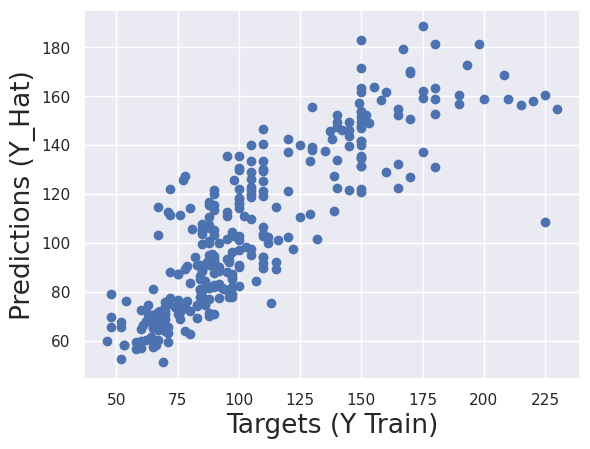

In [64]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (Y Train)',size=19)
plt.ylabel('Predictions (Y_Hat)',size=19)
plt.show()

In [ ]:
sns.distplot(y_train - y_hat)
plt.title('Residual Plot',size=20)

Evakuation

In [65]:
LR.score(x_train,y_train)

0.7330424057982697

In [66]:
LR.coef_

array([33.05764023])

In [67]:
LR.intercept_

104.26144253818603

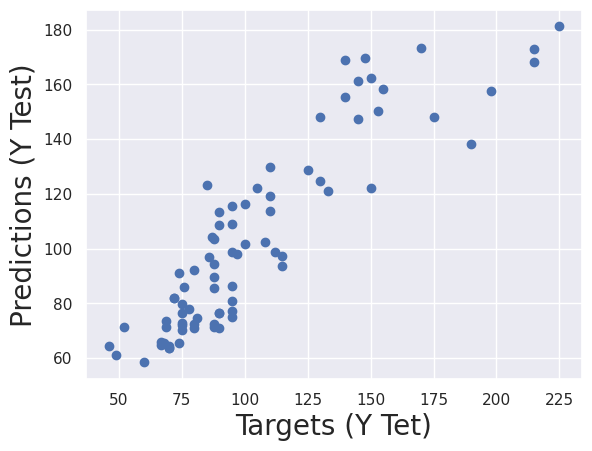

In [42]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets (Y Tet)',size = 20)
plt.ylabel('Predictions (Y Test)',size = 20)

plt.show()

In [71]:
LR.predict([[2500]])[0]

82748.36201235083